# Grids no PyMove

O processo de análise de dados de trajetórias requer acesso frequente a diferentes partes das trajetórias, o que pode ser demorado em grandes volumes de dados. Uma abordagem eficaz é dividir o espaço geográfico em grades, chamadas $"Grids"$.

Cada Grid contém trajetórias que se encaixam nesse período e segmentos de trajetória são representados como pontos com coordenadas de início e fim. O PyMove implementa isso com Grids definidas por coordenadas e atributos como tamanho e células da grid. Essa estratégia organiza os dados para recuperação e análise mais eficientes.

\\
No PyMove, Grids são representadas por objetos que contêm atributos específicos

- *lon_min_x*: longitude mínima.
- *lat_min_y*: latitude mínima.
- *grid_size_lat_y*: tamanho da grid em latitude.
- *grid_size_lon_x*: tamanho da grid em longitude.
- *cell_size_by_degree*: tamanho da célula da grid.

\\
Essa abordagem de dividir o espaço em $Grids$ permite uma maneira eficaz de organizar e acessar os dados de trajetória, facilitando a recuperação rápida das informações desejadas.

# Grids na Prática

Antes de começar, devemos instalar o Pymove no Collab, realizar os imports necessários e carregar os dados que serão usados nessa aplicação. Vamos fazer isso!



In [ ]:
!pip install pymove

In [15]:
from pymove import read_csv
from pymove.core.grid import Grid
#Grid será usada para a criação e manipulação de Grids

data = read_csv('geolife_sample.csv', parse_dates=['datetime'])
data = df[:1000]

# Criando uma Grid Virtual

Para criar uma Grid, devemos usar objeto que importamos na célula anterior. Assim:

In [16]:
grid = Grid(data, 15)
grid.get_grid()

{'lon_min_x': 116.305468,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.00013533905150922183}

# Polígonos
Um polígono é usado para delimitar uma área específica em uma grid geográfica, criamos um polígono com o seguinte comando:

In [17]:
print(grid.create_one_polygon_to_point_on_grid(2, 1))

POLYGON ((116.30560333905152 39.97078167810302, 116.30560333905152 39.970917017154534, 116.30573867810303 39.970917017154534, 116.30573867810303 39.97078167810302, 116.30560333905152 39.97078167810302))


O índice da grid é criado ou atualizado nos dados originais usando o comando:

In [ ]:
grid.create_update_index_grid_feature(data)
data.head()

,lat,lon,datetime,id,index_grid
0,39.984094,116.319236,2008-10-23 05:53:05,1,2871540571
1,39.984198,116.319322,2008-10-23 05:53:06,1,2871540572
2,39.984224,116.319402,2008-10-23 05:53:11,1,2871680846
3,39.984211,116.319389,2008-10-23 05:53:16,1,2871680846
4,39.984217,116.319422,2008-10-23 05:53:21,1,2871680846


Para a criação de Todos os Polígonos para Todos os Pontos na Grid é criada uma estrutura de dados com todos os polígonos, usando o seguinte comando:

In [18]:
grid_data = grid.create_all_polygons_to_all_point_on_grid(data)
grid_data.head()

,id,index_grid_lat,index_grid_lon,polygon
0,1,100,101,POLYGON ((116.31913724420244 39.98404490515092...
1,1,101,102,POLYGON ((116.31927258325395 39.98418024420243...
4,1,101,103,POLYGON ((116.31940792230546 39.98418024420243...
5,1,104,106,POLYGON ((116.31981393945998 39.98458626135696...
6,1,104,105,POLYGON ((116.31967860040848 39.98458626135696...


Também é possível criar todos os polígono sde uma grid com o comando abaixo:

In [ ]:
grid.create_all_polygons_on_grid()

É possível visualizar os polígonos da grid com o seguinte comando:

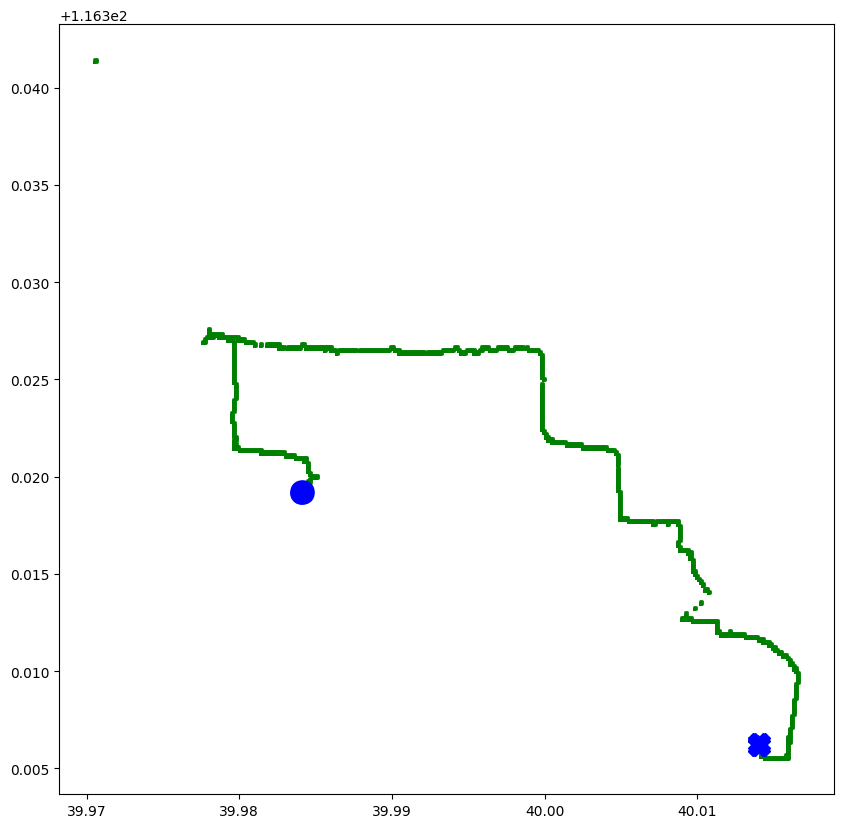

In [19]:
from pymove.visualization.matplotlib import plot_grid_polygons

plot_grid_polygons(grid_data)


# Arquivo .pkl

É possível salvar a Grid em um arquivo .pkl, basta executar a seguinte célula:

In [20]:
grid.save_grid_pkl('teste.pkl')

E para ler um arquivo desse formato, use o seguinte comando:

In [21]:
grid.read_grid_pkl('teste.pkl').get_grid()

{'lon_min_x': 116.305468,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.00013533905150922183}

# Referências

* Exploring Grid. Disponível em: https://github.com/InsightLab/PyMove/blob/master/notebooks/04_Exploring_Grid.ipynb. Acesso em: 14/08/2023.